In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

realtor_data = "Resources/RealtorData.csv"
realtor_file_df = pd.read_csv(realtor_data, encoding="ISO-8859-1")
realtor_file_df

# Initial Data file.

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3,2,0,Adjuntas,Puerto Rico,601,920,NaN,105000
1,for_sale,4,2,0,Adjuntas,Puerto Rico,601,1527,NaN,80000
2,for_sale,2,1,0,Juana Diaz,Puerto Rico,795,748,NaN,67000
3,for_sale,4,2,0,Ponce,Puerto Rico,731,1800,NaN,145000
4,for_sale,6,2,0,Mayaguez,Puerto Rico,680,NaN,NaN,65000
...,...,...,...,...,...,...,...,...,...,...
1048570,for_sale,5,4,0,Hollis,New York,11423,2574,11/8/2004,1175000
1048571,for_sale,7,4,0,Hollis,New York,11423,NaN,12/15/2021,1349000
1048572,for_sale,5,3,0,Hollis,New York,11423,NaN,7/18/2018,925000
1048573,for_sale,4,3,0,Hollis,New York,11423,NaN,3/12/2003,1350000


In [13]:
# Dropping Duplicates
realtor_file_df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3,2,0,Adjuntas,Puerto Rico,601,920,NaN,105000
1,for_sale,4,2,0,Adjuntas,Puerto Rico,601,1527,NaN,80000
2,for_sale,2,1,0,Juana Diaz,Puerto Rico,795,748,NaN,67000
3,for_sale,4,2,0,Ponce,Puerto Rico,731,1800,NaN,145000
4,for_sale,6,2,0,Mayaguez,Puerto Rico,680,NaN,NaN,65000
...,...,...,...,...,...,...,...,...,...,...
1048521,for_sale,4,3,0,Rosedale,New York,11422,NaN,3/18/2002,849990
1048539,for_sale,6,5,0,Rosedale,New York,11422,2315,4/9/2021,1279000
1048543,for_sale,1,1,NaN,Hollis,New York,11423,NaN,2/11/2021,190000
1048558,for_sale,1,1,NaN,Hollis,New York,11423,NaN,NaN,179000


In [14]:
# Adding New Column for if a house has been previously sold and filling empty cells
realtor_file_df['prev_sold_encoded'] = realtor_file_df['prev_sold_date'].map(lambda x: 'Yes' if pd.notna(x) else 'No')
realtor_file_df.fillna(0,inplace=True)

In [15]:
# Naming DataFrame for use.
new_york_df = realtor_file_df[realtor_file_df['city'] == 'New York']
new_york_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2,2,0,New York,New York,10021,0,0,1185000,No
465111,for_sale,12,14,0,New York,New York,10014,8528,0,29995000,No
465513,for_sale,2,2,0,New York,New York,10022,1425,0,895000,No
465515,for_sale,1,2,0,New York,New York,10005,1166,1/10/2014,985000,Yes
465516,for_sale,1,1,0,New York,New York,10065,761,8/18/2020,810000,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1047710,for_sale,1,1,0,New York,New York,10010,750,6/2/2016,1300000,Yes
1047729,for_sale,1,1,0,New York,New York,10025,0,10/31/2014,625000,Yes
1047753,for_sale,3,4,0,New York,New York,10016,2880,5/19/2017,5750000,Yes
1047842,for_sale,2,1,0,New York,New York,11368,0,1/10/2018,182000,Yes


In [16]:
# Gathering general Statistics
mean_numpy = round(np.mean(new_york_df["price"]),2)

median_numpy = round(np.median(new_york_df["price"]),2)

print(f"The average price of a house for sale in New York City is ${mean_numpy}, with the median price of ${median_numpy}")

The average price of a house for sale in New York City is $2616878.11, with the median price of $1280000.0


In [17]:
# Calculate mode
mode_scipy = st.mode(new_york_df["price"])
print(f"The most common price shown from the data is {mode_scipy}")

The most common price shown from the data is ModeResult(mode=995000.0, count=645)


In [18]:
# Variance and St. Dev
var_numpy = np.var(new_york_df["price"],ddof = 0)
print(f"The population variance is {var_numpy}")

sd_numpy = np.std(new_york_df["price"],ddof = 0)
print(f"The population standard deviation is {sd_numpy}")

The population variance is 20853690708309.29
The population standard deviation is 4566584.140066762


In [19]:
# Quartiles
quartiles = new_york_df["price"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price is: 698500.0
The upper quartile of price is: 2750000.0
The interquartile range of price is: 2051500.0
The the median of price is: 1280000.0 
Values below -2378750.0 could be outliers.
Values above 5827250.0 could be outliers.


## What is the most cost efficient floorplan to look for?

In [20]:
# Calculate the number of "Common" living plans and their avergae price

new_york_df2 = new_york_df.copy()
new_york_df2["bed-bath"] = new_york_df2.bed.astype(int).astype(str) + "-" + new_york_df2.bath.astype(int).astype(str)
df = new_york_df2[["bed-bath","price"]].groupby("bed-bath",as_index=False).agg({"price":["mean","count"]}) 
df.columns = ["bed-bath", "avg_price", "count"]
df = df.sort_values(by='count', ascending=False)
df = df.head(10)
df['Cumulative Percentage'] = df['count'].cumsum() / df['count'].sum() * 100
pd.options.display.float_format = '{:.0f}'.format

df

,bed-bath,avg_price,count,Cumulative Percentage
8,1-1,864389,14342,31
25,2-2,1876714,8956,50
1,0-1,580671,6503,64
24,2-1,881494,3321,71
32,3-3,3813602,3068,78
26,2-3,3670254,2554,83
31,3-2,2112105,2392,88
9,1-2,1537241,2262,93
33,3-4,6632459,1942,97
41,4-4,6383738,1170,100


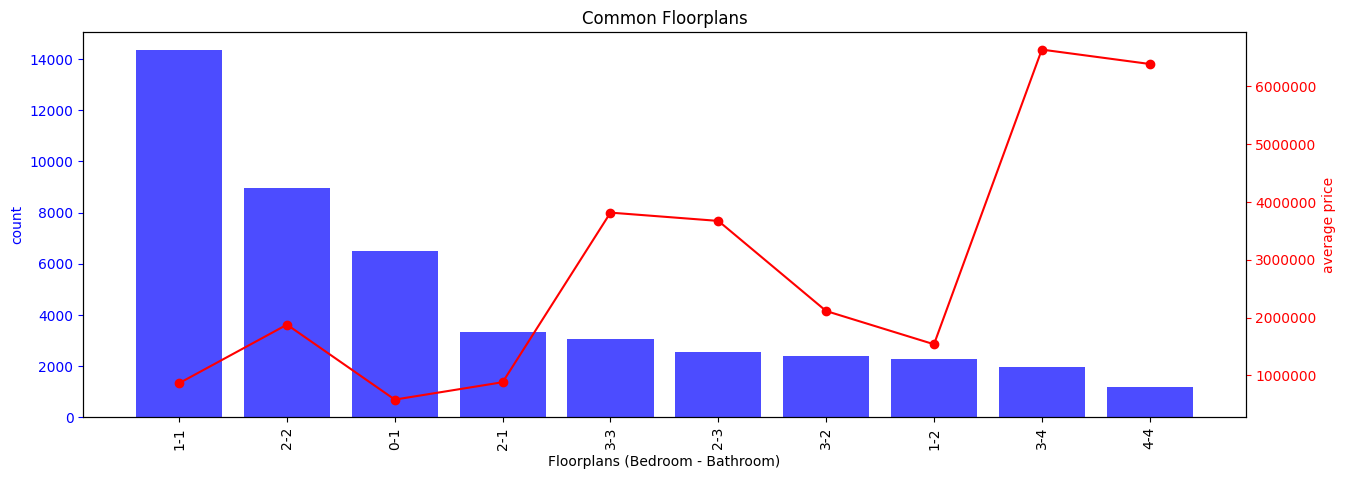

In [21]:
# show on graph
plt.rcParams["axes.formatter.limits"] = (-99, 99)
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.bar(df['bed-bath'], df['count'], color='b', alpha=0.7, label='Count')
ax1.set_xlabel('Floorplans (Bedroom - Bathroom)')
ax1.set_ylabel('count', color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation="vertical")

ax2 = ax1.twinx()
ax2.plot(df['bed-bath'], df['avg_price'], color='r', marker='o', label='Avg. Price')
ax2.set_ylabel('average price', color='r')
ax2.tick_params('y', colors='r')

plt.title('Common Floorplans')
plt.show()

# Analysis

After interpreting the data, The one bedroom one bathroom is in the most abundance within the city and is the second average lowest pricepoint, only beat by the studio apartment. Looking at the information, the 2 bedroom 1 bathroom would be the best cost to space ratio, however, finding a 2-1 for sale would be difficult as there are 3535 spaces available from the overall 55,343